<a href="https://colab.research.google.com/github/Abdul-Mohiz07/Data-Analytics/blob/main/Titanic_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing Dependencies**

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
data = pd.read_csv("titanic.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [9]:
data.columns.unique()

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [12]:
data.shape

(418, 12)

In [14]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [11]:
data.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,86
SibSp,0
Parch,0
Ticket,0
Fare,1


Here we can see that there are missing values in **Age** (a useful feature) and **Cabin** which doesnot help at all to explain any cause of death or survival. One value is missing in **Fare** as well.

**Data Imputation**

In [21]:
mean = data["Fare"].mean()
median = data["Fare"].median()
mode = data["Fare"].mode()[0]

In [22]:
print(f"The mean of Fare is {mean:.2f}")
print(f"The median of Fare is {median:.2f}")
print(f"The mode of Fare is {mode:.2f}")

The mean of Fare is 35.63
The median of Fare is 14.45
The mode of Fare is 7.75


In [23]:
# We will replace the missing value of fare with the median as it will be less sensitive to outliers
data['Fare'].fillna(median, inplace=True)

In [24]:
data['Fare'].isnull().sum()

np.int64(0)

In [25]:
# Now lets remove the Cabin feature as it is not of much value to us
data.drop('Cabin', axis=1, inplace=True)

In [26]:
data.columns.unique()

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [28]:
# For imputing age we will take the reference of Pclass to get a best possible estimate of what to do
mean_age_by_pclass = data.groupby('Pclass')['Age'].mean()

In [29]:
def replace_missing_age(row):
    if pd.isna(row['Age']):
        return mean_age_by_pclass[row['Pclass']]
    return row['Age']

# Apply the function to replace missing ages
data['Age'] = data.apply(replace_missing_age, axis=1)

# Verify the changes (no missing ages should remain)
print("Number of missing ages after replacement:", data['Age'].isna().sum())
print("\nMean Age by Pclass after replacement:")
print(data.groupby('Pclass')['Age'].mean())

Number of missing ages after replacement: 0

Mean Age by Pclass after replacement:
Pclass
1    40.918367
2    28.777500
3    24.027945
Name: Age, dtype: float64


In [30]:
data["Age"].isnull().sum()

np.int64(0)

In [32]:
data.isnull().sum()


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [33]:
# We have imputed values for Age and Fare. We dropped Cabin as it is of low importance to us

In [67]:
# Check for duplicates in the dataset
duplicates = data.duplicated()
print(f"Number of duplicate rows: {duplicates.sum()}")

Number of duplicate rows: 0


**Exploratory Data Analysis**

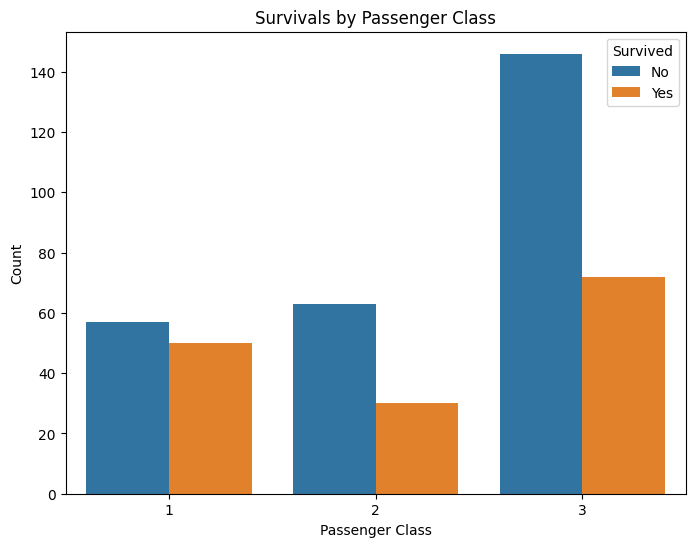

In [34]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Pclass', hue='Survived', data=data)
plt.title('Survivals by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

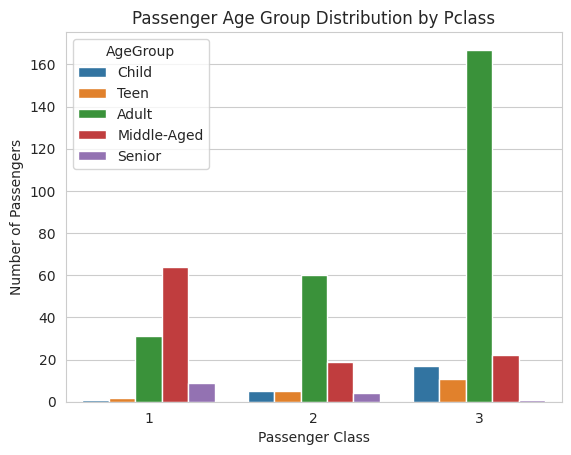

In [78]:
bins = [0, 12, 18, 35, 60, 100]  # Defining age bins
labels = ['Child', 'Teen', 'Adult', 'Middle-Aged', 'Senior']  # Age group labels

data['AgeGroup'] = pd.cut(data['Age'], bins=bins, labels=labels, right=False)  # Creating AgeGroup column

sns.countplot(x='Pclass', hue='AgeGroup', data=data)  #

plt.title('Passenger Age Group Distribution by Pclass')
plt.xlabel('Passenger Class')
plt.ylabel('Number of Passengers')
plt.show()

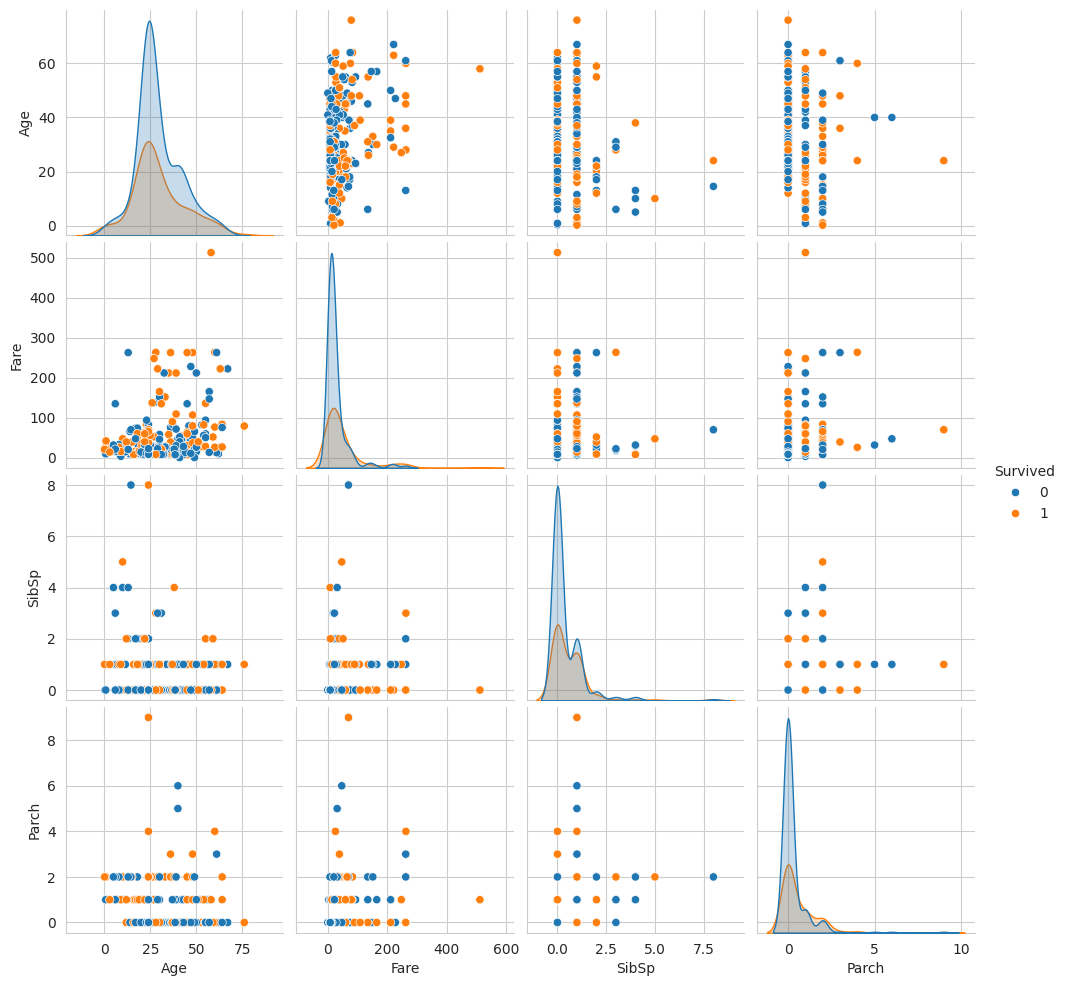

In [65]:
sns.pairplot(data[['Age', 'Fare', 'SibSp', 'Parch', 'Survived']], hue='Survived')
plt.show()

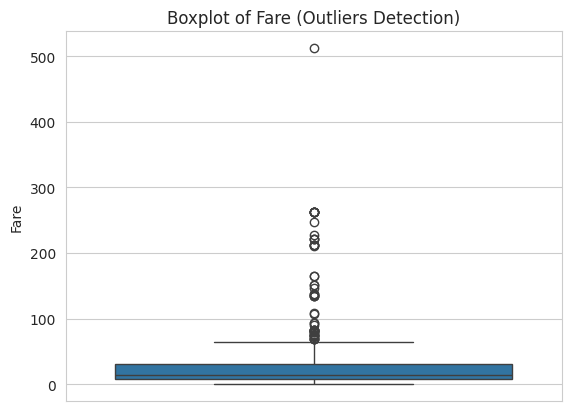

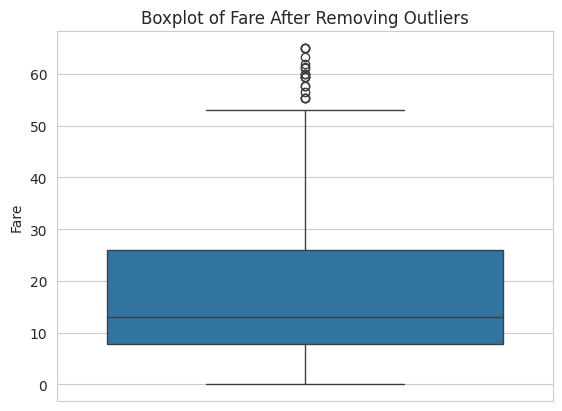

Original data shape: (418, 12)
Cleaned data shape: (363, 12)


In [68]:
# Boxplot to visualize outliers in 'Fare' feature
sns.boxplot(data['Fare'])
plt.title('Boxplot of Fare (Outliers Detection)')
plt.show()

# Calculate the IQR for 'Fare' as outliers lie there
Q1 = data['Fare'].quantile(0.25)
Q3 = data['Fare'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR # Threshold for outliers
upper_bound = Q3 + 1.5 * IQR
# Remove outliers in the 'Fare' feature
data_cleaned = data[(data['Fare'] >= lower_bound) & (data['Fare'] <= upper_bound)]
# Boxplot after removing outliers
sns.boxplot(data_cleaned['Fare'])
plt.title('Boxplot of Fare After Removing Outliers')
plt.show()
# Show the shape of the original and cleaned data to see how many rows were removed
print(f"Original data shape: {data.shape}")
print(f"Cleaned data shape: {data_cleaned.shape}")

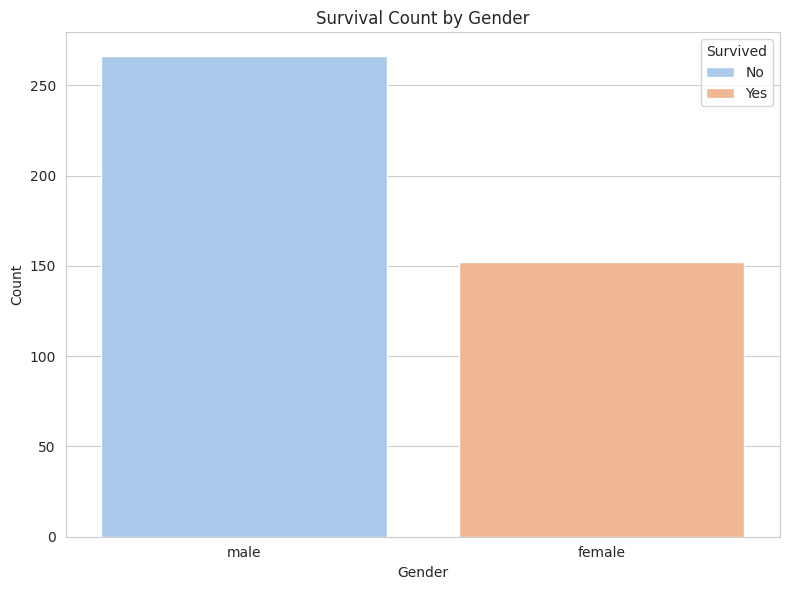

In [70]:
# Plotting the countplot with customization
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='Sex', hue='Survived', palette='pastel')
plt.title('Survival Count by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.tight_layout()

# Show the plot
plt.show()

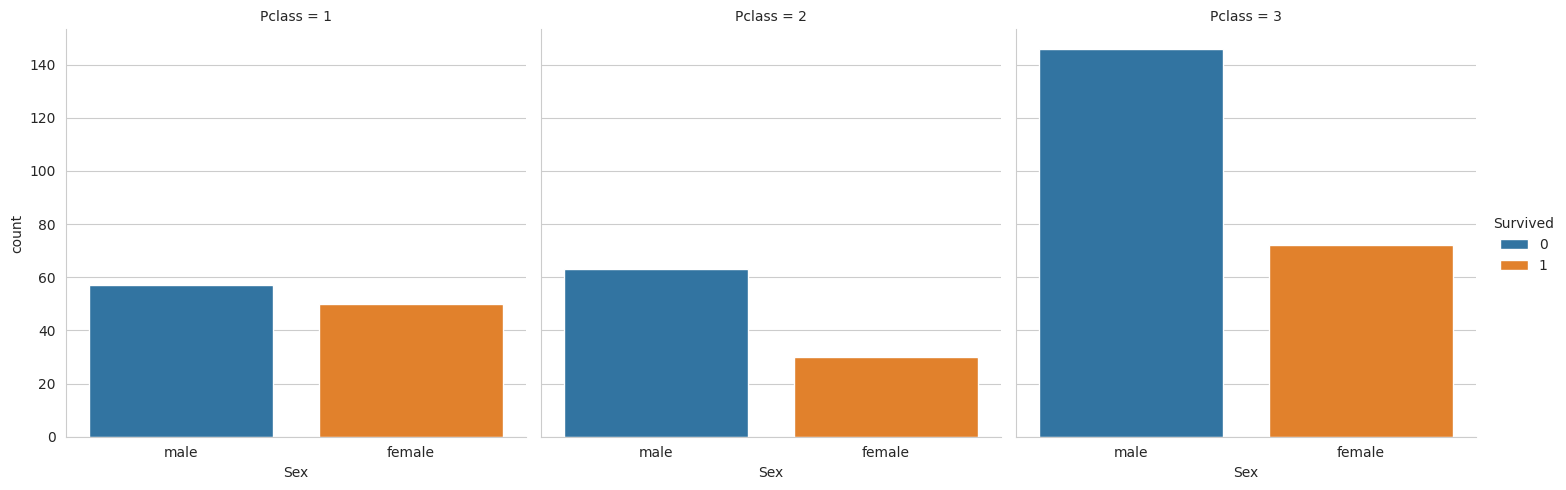

In [48]:
sns.catplot(data=data, x='Sex', hue='Survived', col='Pclass', kind='count')
plt.show()

This plot tells us that male died more as compared to female in every passenger class.

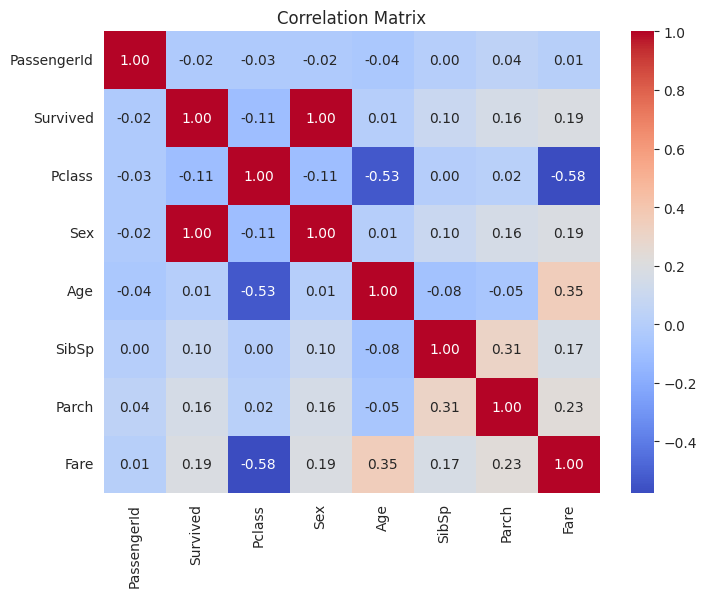

In [52]:
# Create a copy so original data doesnot changes
df = data.copy()
# Convert 'Sex' to numeric: male=0, female=1
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
# Select only numeric columns
numeric_data = df.select_dtypes(include=['number'])
# Compute correlation matrix
corr = numeric_data.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [53]:
corr.loc['Sex', 'Survived']

np.float64(1.0)

**Sex** and **Survived** show a strong positive correlation, indicating females had higher survival rates than males. Represting the child and female resuce rule first.


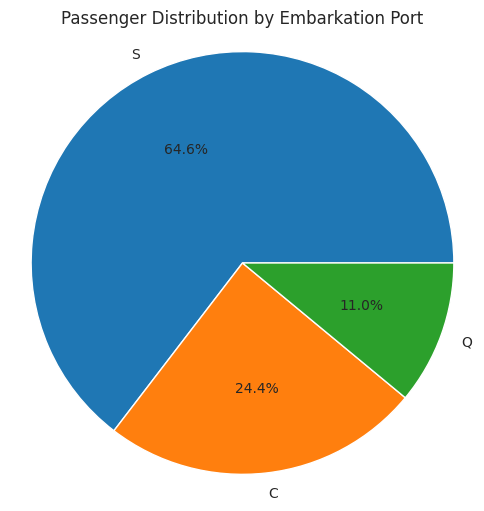

In [56]:
# Count the number of passengers from each embarkation point
embarked_counts = data['Embarked'].value_counts()
# Plot pie chart
plt.figure(figsize=(6, 6))
plt.pie(embarked_counts, labels=embarked_counts.index, autopct='%1.1f%%')
plt.title('Passenger Distribution by Embarkation Port')
plt.axis('equal')
plt.show()



*   Most passengers boarded from Southampton (S) — it's where the Titanic started its journey.

*   Some joined later from Cherbourg (C) and Queenstown (Q) as the ship made stops before heading across the Atlantic.



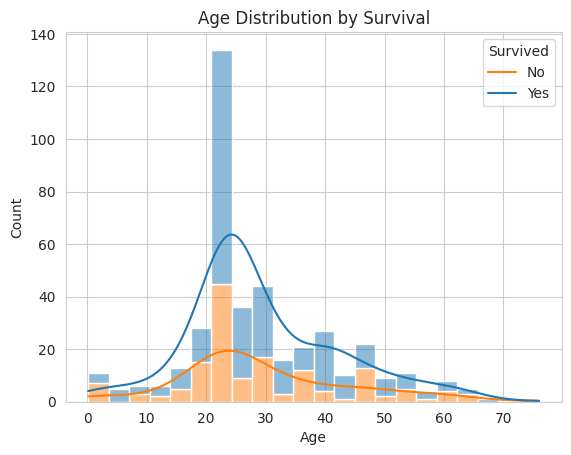

In [59]:
sns.histplot(data=data, x='Age', hue='Survived', kde=True, multiple='stack')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.title('Age Distribution by Survival')
plt.show()

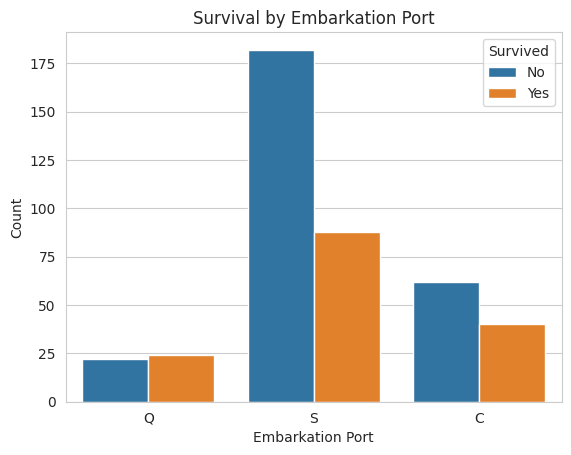

In [62]:
sns.countplot(data=data, x='Embarked', hue='Survived')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.title('Survival by Embarkation Port')
plt.xlabel('Embarkation Port')
plt.ylabel('Count')
plt.show()


As the most number of boarding were from **Southampton** (S) so the most deaths are also from there.

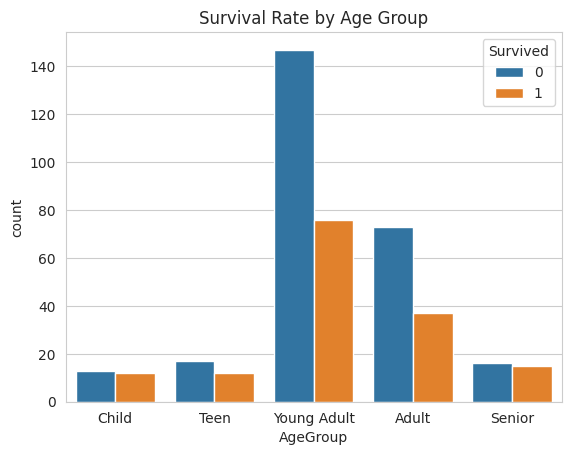

In [63]:
age_bins = [0, 12, 18, 30, 50, 100]
age_labels = ['Child', 'Teen', 'Young Adult', 'Adult', 'Senior']
data['AgeGroup'] = pd.cut(data['Age'], bins=age_bins, labels=age_labels)
sns.countplot(data=data, x='AgeGroup', hue='Survived')
plt.title('Survival Rate by Age Group')
plt.show()

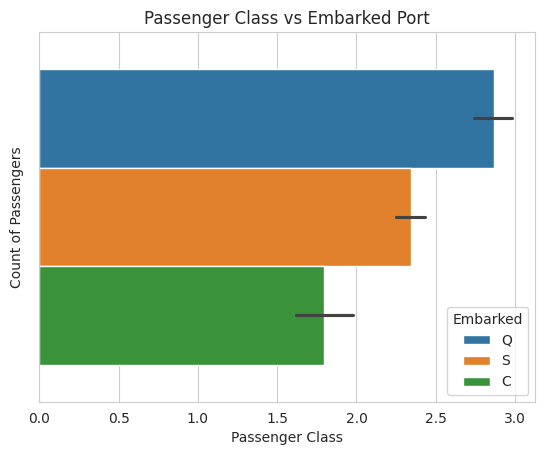

In [76]:
# Create the barplot
sns.barplot(x='Pclass', hue='Embarked', data=data)

# Adding title and labels
plt.title('Passenger Class vs Embarked Port')
plt.xlabel('Passenger Class')
plt.ylabel('Count of Passengers')

# Show the plot
plt.show()